In [1]:
%matplotlib inline
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import lightgbm as lgbm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pickle
import os

/usr/local/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
lr_all = pickle.load(open(os.path.join('mdl', 'lr_all.pkl'), 'rb'))
lr_sep = pickle.load(open(os.path.join('mdl', 'lr_sep.pkl'), 'rb'))
svr_all = pickle.load(open(os.path.join('mdl', 'svr_all.pkl'), 'rb'))
svr_sep = pickle.load(open(os.path.join('mdl', 'svr_sep.pkl'), 'rb'))
rfr_all = pickle.load(open(os.path.join('mdl', 'rfr_all.pkl'), 'rb'))
rfr_sep = pickle.load(open(os.path.join('mdl', 'rfr_sep.pkl'), 'rb'))
xgb_all = pickle.load(open(os.path.join('mdl', 'xgb_all.pkl'), 'rb'))
xgb_sep = pickle.load(open(os.path.join('mdl', 'xgb_sep.pkl'), 'rb'))
gbm_all = pickle.load(open(os.path.join('mdl', 'gbm_all.pkl'), 'rb'))
gbm_sep = pickle.load(open(os.path.join('mdl', 'gbm_sep.pkl'), 'rb'))
models_all = [lr_all,svr_all,rfr_all,xgb_all,gbm_all]
models_sep = [lr_sep,svr_sep,rfr_sep,xgb_sep,gbm_sep]

In [3]:
test_x_all = pd.read_csv(os.path.join('data', 'test_x_all.csv'))
test_x_sep = pd.read_csv(os.path.join('data', 'test_x_sep.csv'))
test_y = pd.read_csv(os.path.join('data', 'test_y.csv'))

In [4]:
pred_all = [mdl_all.predict(test_x_all) for mdl_all in models_all]
pred_sep = [mdl_sep.predict(test_x_sep) for mdl_sep in models_sep]
predictions = pred_all + pred_sep
model_names = ['lr_all','svr_all','rfr_all','xgb_all','gbm_all','lr_sep','svr_sep','rfr_sep','xgb_sep','gbm_sep']

In [5]:
df = pd.DataFrame()
df['model_name'] = model_names
df['l1'] = [mean_absolute_error(test_y, pred_y) for pred_y in predictions]
df['l2'] = [mean_squared_error(test_y, pred_y) for pred_y in predictions]
df['r2'] = [r2_score(test_y, pred_y) for pred_y in predictions]
df['rmse'] = [np.sqrt(res) for res in df.l2]

Text(0.5, 1.0, 'L2')

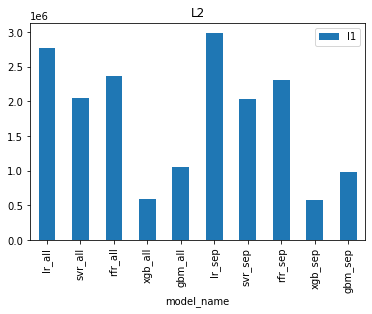

In [6]:
df.plot.bar(x='model_name', y='l1')
plt.title('L2')

Text(0.5, 1.0, 'L2')

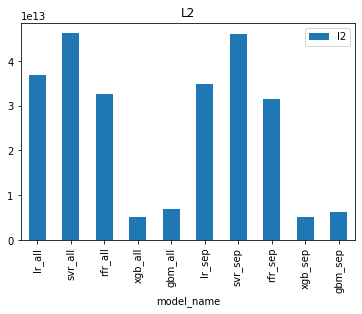

In [7]:
df.plot.bar(x='model_name', y='l2')
plt.title('L2')

Text(0.5, 1.0, 'R2')

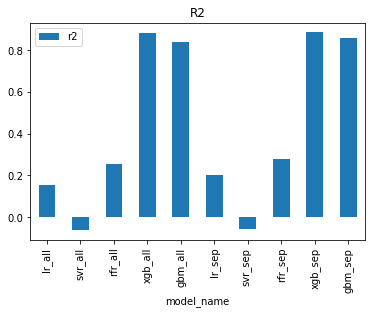

In [8]:
df.plot.bar(x='model_name', y='r2')
plt.title('R2')

Text(0.5, 1.0, 'RMSE')

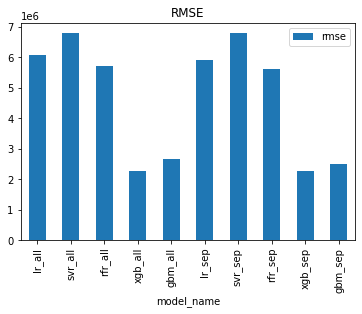

In [9]:
df.plot.bar(x='model_name', y='rmse')
plt.title('RMSE')